# Problem 11

In [1]:
import ema as em
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
mdl = em.Model(2,3)
n = mdl.dnodes
e = mdl.delems

mdl.node('1',  0.0, 0.0)
mdl.node('2', -8.0, 6.0)
mdl.node('3',  0.0, 6.0)
mdl.node('4', -8.0,12.0)
mdl.node('5',  0.0,12.0)

mdl.beam('a', n['1'], n['3'])
mdl.beam('b', n['3'], n['5'])
mdl.beam('c', n['2'], n['3'])
mdl.beam('d', n['4'], n['5'])
mdl.truss('e', n['2'], n['5'])

mdl.fix(n['1'], ['x', 'y', 'rz'])
mdl.roller(n['2'])
mdl.roller(n['4'])

mdl.numDOF()

[[11, 12, 13], [1, 14, 2], [3, 4, 5], [6, 15, 7], [8, 9, 10]]

In [3]:
n['3'].p['x'] =  15
n['5'].p['x'] =  10
e['c'].w['y'] = -10
e['d'].w['y'] = -10

In [4]:
Uf = em.analysis.SolveDispl(mdl)

updated


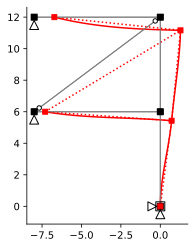

In [5]:
fig, ax = plt.subplots(1,1)
em.plot_U(mdl, Uf, ax, scale=0.001)

In [6]:
mdl.redundant(e['c'], '3')
mdl.redundant(e['d'], '3')
mdl.redundant(e['a'], '2')
B = em.B_matrix(mdl)
B.barx

,$c_3$,$d_3$,$a_2$
$a_1$,0.000000,0.000000,0.125000
$a_2$,0.000000,0.000000,1.000000
$a_3$,0.000000,0.000000,-1.000000
$b_1$,-0.125000,0.000000,0.125000
$b_2$,-1.000000,0.000000,1.000000
$b_3$,0.000000,-1.000000,0.000000
$c_1$,-0.166667,-0.166667,0.166667
$c_2$,0.000000,0.000000,0.000000
$c_3$,1.000000,0.000000,0.000000
$d_1$,-0.000000,-0.000000,0.000000
